<a href="https://colab.research.google.com/github/SaketMunda/introduction-to-nlp/blob/master/nlp_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

In [1]:
# Since we're going to experiment deep-learning models so we need to enable GPUs
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1368deaa-b604-8a20-c46f-23e67b7a8fc2)


## Get Helper functions

In [2]:
# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback

--2023-02-08 02:40:42--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-02-08 02:40:42 (43.2 MB/s) - ‘helper_functions.py’ saved [2904/2904]



## Get a Text Dataset
The dataset that we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster)

See the original source here: https://www.kaggle.com/c/nlp-getting-started

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip the data
unzip_data('nlp_getting_started.zip')

--2023-02-08 02:40:48--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-02-08 02:40:48 (117 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing Text Dataset

To visualize our text samples, we first have to read them in, so we can do it through pandas.

In [4]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# check the shapes
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [5]:
# view some samples
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


So here, `text` is the tweet and `target` variable is to identify whether the tweet is a disaster or not, so if `1` then it's a disaster else not a disaster.

Let's visualize some random `training` samples, but before that this is a good practice to shuffle the training samples first,

In [6]:
train_df_shuffled = train_df.sample(frac=1, random_state=17)
# frac=1 means 100% of samples will be shuffled
train_df_shuffled

,id,keyword,location,text,target
7027,10072,typhoon,NaN,Typhoon Soudelor: When will it hit Taiwan ÛÒ ...,1
318,463,armageddon,NaN,RT @RTRRTcoach: #Love #TrueLove #romance lith ...,0
1681,2425,collide,www.youtube.com?Malkavius2,I liked a @YouTube video from @gassymexican ht...,0
5131,7318,nuclear%20reactor,"New York, New York",Japan's Restart of Nuclear Reactor Fleet Fast ...,1
2967,4262,drowning,"Hendersonville, NC",#ICYMI #Annoucement from Al Jackson... http://...,0
...,...,...,...,...,...
406,584,arson,"Jerusalem, Israel",Mourning notices for stabbing arson victims st...,1
5510,7863,quarantined,"Livonia, MI",Reddit's new content policy goes into effect m...,0
2191,3139,debris,NaN,Plane debris discovered on Reunion Island belo...,1
7409,10600,wounded,santo domingo,Police Officer Wounded Suspect Dead After Exch...,1


In [7]:
# how does the test set looks like ?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# How many examples of each class ?
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# Let's visualize some random samples

import random
random_index = random.randint(0, len(train_df_shuffled)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(disaster)" if target > 0 else "(not a disaster)")
  print(f"Text:\n{text}\n")
  print("----------\n")

Target: 0 (not a disaster)
Text:
Wholesale #WE Gon Rep That $hit At All Costs- Hazardous #WholeTeam3 #WholesaleEnt https://t.co/JWnXH9Q5ov

----------

Target: 1 (disaster)
Text:
@UrufuSanRagu a Mudslide?

----------

Target: 1 (disaster)
Text:
Some poor sods arriving in Amman during yesterday's dust storm were diverted to Ben Gurion airport: http://t.co/jkpjpcH9i6

----------

Target: 1 (disaster)
Text:
@hannahkauthor Read: American lives first | The Chronicle #FreeAmirNow #FreeALLFour #Hostages held by #Iran #IranDeal http://t.co/gWnLHNeKu9

----------

Target: 0 (not a disaster)
Text:
And last year it was just a lot of 'THE DRUMS ARE FLOODING' and 'JANICE I'M FALLING'

----------



## Split dataset into Train and Validation sets

Since the test set doesn't contain the target variable so we might need some unseen data for model to be validated after training, so how about splitting our training set for validating purpose with some amount.


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=17)

## Converting Text into Numbers

Our labels are in numerical form (0 and 1) but our tweets are in string form.

But machine learning algorithm learns only through numbers so we have to convert those tweets/texts into numbers.

In NLP, there are two main concepts for turning text into numbers,
- **Tokenization** : A straight mapping from **word**(known as *word-level tokenization*) or character(which is *character-level tokenization*) or sub-word(*sub-word tokenization*) to a numerical value. Just like One hot encoding, suppose we have a sentence as "My name is Alpha", then if we are mapping according to word, "My" would `0`, "name" as `1`, "is" as `2` and "Alpha" as `3`.
- **Embeddings** : An embedding is a representation of natural language which can be learned. Representation comes in the form of **feature-vector**. For example the word "Alpha" could be represented by 5-D vector `[0.564, 0.897, 0.456, -0.987, 0.15]`. The size of the feature vector is tuneable. There are two ways to use embeddings:

    - **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as `tf.keras.layers.Embedding`) and an embedding representation will be learned during model training.
    - **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.


Simply, 

**Tokenization** : Straight mapping from word to number.

**Embedding** : Richer representation of relationships between tokens.

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using [tf.keras.layers.concatenate](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)).

If you're looking for pre-trained word embeddings, [Word2vec embeddings](https://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on TensorFlow Hub are great places to start.

Much like searching for a pre-trained computer vision model, we can search for pre-trained word embedding to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

### Text Vectorization

Mapping words to numbers.

To tokenize our words, we'll use the preprocessing layer,
`tf.keras.layers.preprocessing.TextVectorization`

In [11]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Using the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                 standardize="lower_and_strip_punctuation", # how to process the text
                                 split="whitespace", # how to split the text
                                 ngrams=None, # create groups of n-words
                                 output_mode='int', # how to map tokens to numbers
                                 output_sequence_length=None) # How long should the output sequence of tokens be?

About the above params,

- `max_tokens` : The maximum number of words in your vocabulary (e.g 20000 or the number of unique words in your text), includes a value for OOV(out of vocabulary) tokens
- `standardize` : Methods for standardizing text
- `split`: split the text
- `ngrams`: how many words to contain per token split, for example if 2, it splits tokens into continous sequences of 2
- `output_mode`: How to output tokens can be `int`(integer mapping), `binary`(OHE), `count` or `tf-idf`
- `output_sequence_length`: Length of tokenized sequence to output, For example if set to 150, all tokenized sequences will be 150 tokens long.

In the above cell, we have initialized the object with the default settings but let's customize it a little bit for our own use case.

In particular, let's set values for `max_tokens` and `output_sequence_length`.

For `max_tokens`(the number of words in the vocabulary), multiples of 10,000(`10,000`, `20,000`, `30,000`) or the exact number of unqiue words in your text(e.g `32,179`) are common values.

For our use case, `10,000`

And for the `output_sequence_length` we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.

In [12]:
# Find average number of tokens (words) in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [13]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

To map our `TextVectorization` instance `text_vectorizer` to our data, we can call the `adapt()` method on it whilst passing it our training set.

In [14]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Training data mapped! Let's try our `text_vectorizer` on a custom sentence.

In [15]:
# create a sample sentence
sample_sentence = "There's a flood in my village!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[281,   3, 214,   4,  13, 881,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Try our `text_vectorizer` on a few random sentences ?

In [16]:
import random
random_sentence = random.choice(train_sentences)
print(f'Original Text: \n{random_sentence}\
        \n\n Vectorized Text:')
text_vectorizer([random_sentence])

Original Text: 
@ChrisDyson16 Just wait until your friends at #MTA ruin it #Sorrybutitstrue        

 Vectorized Text:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   30,  752,  269,   33,  779,   17,    1,  374,   15, 8250,
           0,    0,    0,    0]])>

We can also check the unique tokens in our vocabulary using the `get_vocabulary()` method

In [17]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens

print(f"Number of words in Vocab:{len(words_in_vocab)}")
print(f"Top 5 most common words:{top_5_words}")
print(f"Bottom 5 least common words:{bottom_5_words}")

Number of words in Vocab:10000
Top 5 most common words:['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words:['ovo', 'overåÊhostages', 'overzero', 'overwatch', 'overturns']


### Embedding

**Create an Embedding using Embedding Layer**

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather that just be static, a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the `tf.keras.layers.Embedding` layer.



In [18]:
tf.random.set_seed(17)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")
embedding

`embedding` is a TensorFlow Layer, so that we can use it as part of a model, meaning its parameters(word representations) can be updated and improved as the model learns.



In [19]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}")
print("\n\nEmbedded version:")

# embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
I want to see my @AustinPearcy22 so bad its not even funny. I will probably cry and drowned him in kisses when I do. ????


Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02343173, -0.02652723, -0.03152039, ...,  0.02102336,
          0.00488753, -0.0158362 ],
        [-0.02298733,  0.02857829, -0.0227545 , ...,  0.00953416,
         -0.04039486, -0.03494654],
        [ 0.04393915,  0.03116182, -0.01985701, ..., -0.03828044,
          0.04807109, -0.02644128],
        ...,
        [ 0.02343173, -0.02652723, -0.03152039, ...,  0.02102336,
          0.00488753, -0.0158362 ],
        [-0.00900798, -0.02913499,  0.02235535, ..., -0.00696812,
         -0.03225274,  0.04643698],
        [-0.0459116 ,  0.03902522,  0.02884947, ...,  0.007984  ,
          0.04224494,  0.04923623]]], dtype=float32)>

These values might not mean much to us but they're what our computer sees each word as. When our model looks for patterns in different samples, these values will be updated as necessary.

If we review the shape of Embedded Version Tensor it is, `(1, 15, 128)`, it means that,
- 1: Is the quantity of sequences(sentences) we passed
- 15: is the `max_length` that we decided to normalize every sentence, if greater than 15 tokens/words then trim extra tokens or if less than 15 then pad it.
- 128: is the array size of each words, for example above sentence as `Now`, for this token the embedding tensor will look like,

In [20]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02343173, -0.02652723, -0.03152039,  0.0001976 ,  0.03178922,
       -0.02187899,  0.01466176,  0.02729701, -0.01650792,  0.00071656,
        0.01262747, -0.03931329,  0.04047468,  0.0302651 ,  0.04066459,
        0.02593447, -0.01407721,  0.00172062, -0.01581769, -0.041679  ,
        0.04537575,  0.0138167 ,  0.0227331 , -0.01948496,  0.02788392,
       -0.04262939,  0.00603651, -0.04573451,  0.0013571 , -0.0103989 ,
       -0.0108821 ,  0.01489433, -0.02658217,  0.00662044, -0.04545839,
        0.02706282,  0.03625358, -0.03858987,  0.04437229, -0.02241309,
       -0.00491514,  0.02914338,  0.02270282,  0.04649563, -0.0364399 ,
        0.00605464, -0.03569745, -0.04163226, -0.02132156, -0.00294595,
       -0.01529732,  0.02561878, -0.02697936,  0.04775373,  0.0125651 ,
       -0.04730059,  0.0405975 , -0.03300925, -0.00553391, -0.02913319,
        0.01346369, -0.0016955 , -0.03761097, -0.03137752,  0.01358772,
       -0.014305

## Evaluation function for our Model Experiments

Since we're going to perform multiple experiments by creating deeplearning models and scikit learn algorithms, so to track them we should create a common function for comparison.

There are various metrics to evaluate the classification models like precision, f1-score, recall. So let's look at them through a function altogether.

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates Model accuracy, precision, recall and f1-score for a binary classification model
  """
  # calculate the model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # calculate precision, recall, f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy * 100,
                   "precision":model_precision,
                   "recall": model_recall,
                   "f1-score": model_f1}
                  
  return model_results

## Modelling a Text Dataset

For experiments with various machine learning model for text classifier we will be considering below experiments:
- **Model 0** : Naive Bayes (baseline)
- **Model 1** : Feed-forward neural network (dense model) 
- **Model 2** : LSTM Model (RNN)
- **Model 3** : GRU (RNN)
- **Model 4** : Bidirectional-LSTM (RNN)
- **Model 5** : 1D CNN
- **Model 6** : TF Hub Pre-trained Feature Extractor
- **Model 7** : Same as model 6 with 10% of training samples

### Model 0 : Getting a baseline

We'll use `scikit-learn` library for building this model, and create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert words into numbers and then model them using Multinomial Naive Bayes Algorithm.

> 📖 **Reading**: About TF-IDF on [Scikit-learn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

Multinomial Naive Bayes model is kind of shallow model which trains faster.

In [23]:
# evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 80.18%


In [24]:
# let's make some predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [25]:
# it is similar to our labels
val_labels[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [26]:
# get the results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 80.18372703412074,
 'precision': 0.8125567744156732,
 'recall': 0.8018372703412073,
 'f1-score': 0.7968681002825004}

### Model 1 : A Simple Dense Model

The first "deep" model we're going to build is a single layer dense model.

In [27]:
from tensorflow.keras import layers

# Create directory to save Tensorboard logs
SAVE_DIR = "model_logs"

# Build model with functional API
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn text inputs into numbers using text_vectorizer
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_model_1 = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving Tensorboard log files to: model_logs/simple_dense_model/20230208-024055
Epoch 1/5
215/215 [==============================] - 4s 5ms/step - loss: 0.6152 - accuracy: 0.6854 - val_loss: 0.5256 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4439 - accuracy: 0.8167 - val_loss: 0.4640 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.8616 - val_loss: 0.4596 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2846 - accuracy: 0.8864 - val_loss: 0.4721 - val_accuracy: 0.7979
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.9101 - val_loss: 0.4938 - val_accuracy: 0.7953


In [28]:
# evaluate the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7953


[0.4938335716724396, 0.7952755689620972]

In [29]:
# make some predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.12096813],
       [0.00963379],
       [0.07517963],
       [0.43156   ],
       [0.9998043 ],
       [0.8580827 ],
       [0.13515034],
       [0.894733  ],
       [0.58565694],
       [0.08657645]], dtype=float32)

Alright ! Let's some more evaluations by using our common function for evaluation.

In [30]:
# for the evaluation we have to make it similar to our val_labels which is in 0 and 1
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [31]:
simple_dense_results = calculate_results(y_true=val_labels,
                                         y_pred=model_1_preds)

simple_dense_results

{'accuracy': 79.52755905511812,
 'precision': 0.7966788703003602,
 'recall': 0.7952755905511811,
 'f1-score': 0.7932321923411083}

For comparing the results like these between two models, let's create a helper function

In [32]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for k,v in baseline_results.items():
    print(f"Baseline {k}: {v:.2f}, New {k}: {new_model_results[k]:.2f}, Difference: {new_model_results[k] - v:.3f}")

In [33]:
compare_baseline_to_new_results(baseline_results, simple_dense_results)

Baseline accuracy: 80.18, New accuracy: 79.53, Difference: -0.656
Baseline precision: 0.81, New precision: 0.80, Difference: -0.016
Baseline recall: 0.80, New recall: 0.80, Difference: -0.007
Baseline f1-score: 0.80, New f1-score: 0.79, Difference: -0.004


## Visualizing Learned Embeddings

Our first model (`model_1`) contained an embedding layer (`embedding`) which learned a way of representing words as feature vectors by passing over the training data.

To understand what a text embedding is, let's visualize the embedding our model learned.

In [34]:
# get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

And now let's get our embedding layer's weights (these are the numerical representations of each word).

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
# get the weight matrix of embedding layer
embed_weights = model_1.layers[2].get_weights()[0] 
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [37]:
embed_weights[0]

array([-0.05793181, -0.03914464, -0.02473383, -0.00400928,  0.02946338,
       -0.01301204,  0.05229732,  0.04887474,  0.06025089,  0.00805069,
        0.06344493,  0.06382313,  0.03528398, -0.0243746 , -0.03784518,
       -0.00860966, -0.02997296, -0.00939369,  0.05955035, -0.0666528 ,
       -0.0153504 ,  0.01206796,  0.01324632,  0.00885768, -0.03989453,
        0.0059811 , -0.05867316,  0.01391945, -0.01342947, -0.0315125 ,
       -0.01170612, -0.01470302,  0.05553511,  0.06478362, -0.03305588,
        0.00180237,  0.03188962, -0.01603713,  0.0065343 , -0.01364341,
       -0.01092497,  0.03955518, -0.00912936, -0.04180071, -0.01730738,
       -0.00267582, -0.05257865, -0.00593809, -0.00243137, -0.00406673,
        0.0593499 ,  0.0077191 , -0.0055135 , -0.03471249, -0.0266527 ,
       -0.01058053,  0.01899304, -0.05025221, -0.01186906, -0.00643935,
       -0.03974142, -0.02110856, -0.00443363, -0.00674051,  0.0227233 ,
        0.02054   , -0.01021375, -0.03714587,  0.03495809, -0.00

Now we've got these two objects, we can use the [Embedding Projector Tool](http://projector.tensorflow.org/) to visualize our embedding.

To use the embedding projector tool, we need two files,
- the embedding vectors (same as embedding weights)
- the metadata of the embedding vectors (the words they represent - our vocabulary)

In [38]:
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num==0:
#     continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file

# out_v.close()
# out_m.close()


# # Download files locally to upload to Embedding projector

# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## Recurrent Neural Networks(RNN's)

For further experimentations we're going to use special kind of neural networks used for sequence data such as to predict the next location based on the prior location or may be to generate a new sequence based on the past sequences which is done through **Recurrent Neural Networks (RNN)**.

Recurrent Neural Networks can be used for a number of sequence-based problems:
- **One to One:** one input, one output, such as image classification
- **One to many:** one input, many output, such as image captioning
- **Many to one:** many inputs, one outputs, such as text classification
- **Many to Many:** many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text

Most commong RNN cell or layers used for designing the network are:
- LSTM (Long Short Term Memory)
- GRU (Gates Recurrent Unit)
- Bidirectional RNNs (passes forward and backward along a sequence, left to right and right to left)

The architecture of the RNNs would be,

      Input(text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

### Model 2 : LSTM

> **Note**: For a best practice when we are comparing different models then embedding layer should be different because embedding layer is a learned representation of words, if we were to use the same embedding layer for each model, we'd be mixing what one model has learned with the next. 

In [39]:
# set random seed and creating embedding layer (new embedding layer for each model)
tf.random.set_seed(17)
from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                           output_dim=128,
                                           embeddings_initializer="uniform",
                                           input_length=max_length,
                                           name="embedding_2")

# Create LSTM model
input = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(input)
x = model_2_embedding(x)
#print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (if we want to stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(input, output, name="model_2_LSTM")

According to the Tensorflow documentation on LSTM, it accepts 3D input tensor as [batch, timestamp, feature_vector] so when we stack one more cell of LSTM, then we must set `return_sequences=True` so that when next LSTM cell is stacked will be inject with 3D input or else it would through error of "expecting 3D tensor but received 2D"

### Helper Function for Compiling and Fitting the Model

In [40]:
# for compiling and fitting the model let's create a helper function

def compile_fit_RNNs(model, dir_name, experiment_name):
  """
  Function used for compiling and fitting the model and save the 
  tensorboard experiment as well on the passed directory

  Returns the model history
  """
  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

  # fit the model
  history = model.fit(train_sentences,
                      train_labels,
                      epochs=5,
                      validation_data=(val_sentences, val_labels),
                      callbacks=[create_tensorboard_callback(dir_name, experiment_name)])
  
  return history

In [41]:
model_2_history = compile_fit_RNNs(model=model_2, dir_name=SAVE_DIR, experiment_name="model_2_LSTM")

Saving Tensorboard log files to: model_logs/model_2_LSTM/20230208-024103
Epoch 1/5
215/215 [==============================] - 7s 9ms/step - loss: 0.5133 - accuracy: 0.7434 - val_loss: 0.4492 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3184 - accuracy: 0.8695 - val_loss: 0.4724 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2199 - accuracy: 0.9204 - val_loss: 0.5474 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1537 - accuracy: 0.9456 - val_loss: 0.6827 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1108 - accuracy: 0.9603 - val_loss: 0.8267 - val_accuracy: 0.7664


If we check the summary of the LSTM Model

In [42]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [43]:
# make some predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.0211548 ],
       [0.00182996],
       [0.01620475],
       [0.16472119],
       [0.9998977 ],
       [0.99410546],
       [0.01473758],
       [0.7996622 ],
       [0.8936984 ],
       [0.54785395]], dtype=float32)

In [44]:
# convert them to compare with labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 1.], dtype=float32)>

In [45]:
# Let's calculate the results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.64041994750657,
 'precision': 0.7659025055163764,
 'recall': 0.7664041994750657,
 'f1-score': 0.7660201893659146}

In [46]:
# compare the baseline results with model_2
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 80.18, New accuracy: 76.64, Difference: -3.543
Baseline precision: 0.81, New precision: 0.77, Difference: -0.047
Baseline recall: 0.80, New recall: 0.77, Difference: -0.035
Baseline f1-score: 0.80, New f1-score: 0.77, Difference: -0.031


### Model 3 : GRU

The GRU cell has similar features to an LSTM cell but has less parameters.

In [47]:
# set the random seed and create new embedding layer
tf.random.set_seed(17)

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name="embedding_3")

# Build GRU model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')


In [48]:
# let's see the summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

It's the same as LSTM model but with less params

In [49]:
# compile and fit the model
model_3_history = compile_fit_RNNs(model_3, SAVE_DIR, "model_3_GRU")

Saving Tensorboard log files to: model_logs/model_3_GRU/20230208-024126
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.5328 - accuracy: 0.7219 - val_loss: 0.4518 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3221 - accuracy: 0.8641 - val_loss: 0.4690 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2178 - accuracy: 0.9181 - val_loss: 0.5357 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1489 - accuracy: 0.9499 - val_loss: 0.6772 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1122 - accuracy: 0.9625 - val_loss: 0.6983 - val_accuracy: 0.7559


In [50]:
# make predictions
model_3_pred_probs = model_3.predict(val_sentences)
# convert them into labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs)) 
model_3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [51]:
# calculate the result
model_3_results = calculate_results(y_true=val_labels,
                                   y_pred=model_3_preds)
model_3_results

{'accuracy': 75.59055118110236,
 'precision': 0.7551876442680979,
 'recall': 0.7559055118110236,
 'f1-score': 0.7551196015270819}

In [52]:
# compare with baseline score
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 80.18, New accuracy: 75.59, Difference: -4.593
Baseline precision: 0.81, New precision: 0.76, Difference: -0.057
Baseline recall: 0.80, New recall: 0.76, Difference: -0.046
Baseline f1-score: 0.80, New f1-score: 0.76, Difference: -0.042


It's looks like Baseline is still outperforming dense models, let's see one more model

### Model 4 : Bidirectional RNNs

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [53]:
tf.random.set_seed(17)
model_4_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name="embedding_4")

# Build the Bidirectional Model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_Bidirectional')

In [54]:
# see the summary
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

Notice the parameters of the Bidirectional layer get doubled.

In [55]:
# compile and fit
model_4_history = compile_fit_RNNs(model_4, SAVE_DIR, "model_4_Bidirectional")

Saving Tensorboard log files to: model_logs/model_4_Bidirectional/20230208-024139
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5140 - accuracy: 0.7427 - val_loss: 0.4542 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3149 - accuracy: 0.8691 - val_loss: 0.4835 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2171 - accuracy: 0.9202 - val_loss: 0.5680 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1469 - accuracy: 0.9520 - val_loss: 0.6563 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1036 - accuracy: 0.9641 - val_loss: 0.7833 - val_accuracy: 0.7598


In [56]:
# make predictions
model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 1s 3ms/step


In [57]:
# convert them into labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [58]:
# calculate the result
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7600694650010854,
 'recall': 0.7598425196850394,
 'f1-score': 0.7599441744417845}

In [59]:
# compare with baseline scores
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 80.18, New accuracy: 75.98, Difference: -4.199
Baseline precision: 0.81, New precision: 0.76, Difference: -0.052
Baseline recall: 0.80, New recall: 0.76, Difference: -0.042
Baseline f1-score: 0.80, New f1-score: 0.76, Difference: -0.037


## Convolution Neural Networks for Text

CNNs can be used to train Text inputs by using the 1-Dimension layers instead of 2-Dimensional convolution like did with Images.

A Typical CNN architecture for sequences will look like the following:

```
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
```

The main difference would be to use `tf.keras.layers.Conv1D()` instead of LSTM, GRU or Bidirectional cell in the layers, rest will be same.

### Model 5 : Conv1D 

Let's see first 1-dimensional convolutional layer (also called a temporal convolution), temporal means the data in timestamp sequences.

In [60]:
# Test our embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(['This is a test for conv layer'])) 
conv_1d = layers.Conv1D(filters=32, kernel_size=5, strides=1, activation="relu", padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

The output shape of `conv_1d_output` is `[1,11,32]`, here the input length was `15` and output_dim - `128` of sequences in the embedding layer.

The 1-D conv layer compressed inline with its parameters. And the same goes for max pooling layer output.

Our text starts out as a string but gets converted to a feature vector of length 32 through various transformation steps(from tokenization to embedding to 1-Dimensional convolution to max pool).

In [61]:
## see the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.00563604,  0.00831303, -0.03987604, ..., -0.00901502,
          -0.02458371, -0.00313253],
         [ 0.01050907,  0.07342833, -0.02361131, ..., -0.01137419,
           0.03161566,  0.01970428],
         [-0.03601192,  0.00866883, -0.04841171, ..., -0.04186256,
           0.03951384, -0.02277594],
         ...,
         [-0.05793181, -0.03914464, -0.02473383, ...,  0.00409453,
           0.02326121, -0.00015124],
         [-0.05793181, -0.03914464, -0.02473383, ...,  0.00409453,
           0.02326121, -0.00015124],
         [-0.05793181, -0.03914464, -0.02473383, ...,  0.00409453,
           0.02326121, -0.00015124]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.03461808, 0.04056317, 0.03943498, 0.03135175,
          0.00109525, 0.001645  , 0.02065375, 0.03384818, 0.06376338,
          0.        , 0.        , 0.        , 0.        , 0.02814319,
          0.        , 0.

Let's build the model

In [62]:
tf.random.set_seed(17)
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_5')

# Create 1-D conv layer
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

# see the summary of the model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [63]:
# compile and fit the model
model_5_history = compile_fit_RNNs(model_5, SAVE_DIR, "Conv1D_model_5")

Saving Tensorboard log files to: model_logs/Conv1D_model_5/20230208-024156
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.5492 - accuracy: 0.7230 - val_loss: 0.4671 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3318 - accuracy: 0.8628 - val_loss: 0.4971 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1983 - accuracy: 0.9295 - val_loss: 0.5832 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1230 - accuracy: 0.9580 - val_loss: 0.7008 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0889 - accuracy: 0.9715 - val_loss: 0.7734 - val_accuracy: 0.7598


In [64]:
# make some predictions
model_5_pred_probs = model_5.predict(val_sentences)
# convert them into labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

model_5_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [65]:
# calculate the results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.759153894646392,
 'recall': 0.7598425196850394,
 'f1-score': 0.7589128680335064}

In [66]:
# compare with baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 80.18, New accuracy: 75.98, Difference: -4.199
Baseline precision: 0.81, New precision: 0.76, Difference: -0.053
Baseline recall: 0.80, New recall: 0.76, Difference: -0.042
Baseline f1-score: 0.80, New f1-score: 0.76, Difference: -0.038


## Use Pretrained Embeddings (transfer learning for NLP)

A common practice is to leverage pretrained embeddings through transfer learning. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.

Instead of using our own embedding layer, we're going to replace with a pretrained embedding layer.

We're going to use the [Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) from Tensorflow Hub (a great resource containing a plethora of pretrained model resources for a variety of tasks.)



### Model 6 : TF Hub Pretrained Sentence Encoder

Universal Sentence Encoder creates whole sentence-level embedding rather than creating a word-level embedding that we did earlier.

Our embedding layer outputs an 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

In [67]:
sample_sentence

"There's a flood in my village!"

In [68]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load universal sentence encoder
embed_samples = embed([sample_sentence, 
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.00875852  0.02968347  0.03308665 -0.02835228 -0.01226963  0.08441445
  0.03303674  0.05103541 -0.01697742 -0.01577765  0.06972899  0.00490609
 -0.02069244  0.07354212  0.07200169 -0.02784333  0.00856447 -0.05491454
  0.02859962 -0.03333077 -0.01728002  0.0557287   0.04092591  0.05927492
 -0.01725632 -0.04377813 -0.00842895 -0.00564028 -0.04898241 -0.02710576
 -0.03276608  0.0313632  -0.00436723 -0.03436001  0.03699801 -0.04601654
  0.04075051  0.03726257 -0.03553419 -0.0628173  -0.03123069 -0.0353759
  0.00546736  0.05002001 -0.09777351 -0.06816328 -0.01440394 -0.01097005
 -0.04983862  0.0248761 ], shape=(50,), dtype=float32)


In [69]:
# each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

Now, we can use the USE module into a Keras layer using the `hub.KerasLayer` class

In [70]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [71]:
# Create the model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
], name='model_6_USE')

# compile and fit the model
model_6_history = compile_fit_RNNs(model_6, SAVE_DIR, "tf_hub_sentence_encoder")

Saving Tensorboard log files to: model_logs/tf_hub_sentence_encoder/20230208-024301
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.5095 - accuracy: 0.7811 - val_loss: 0.4392 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4143 - accuracy: 0.8175 - val_loss: 0.4306 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3998 - accuracy: 0.8232 - val_loss: 0.4296 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3906 - accuracy: 0.8278 - val_loss: 0.4292 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3826 - accuracy: 0.8337 - val_loss: 0.4294 - val_accuracy: 0.8268


In [72]:
# summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [73]:
# making predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

model_6_preds[:10]

24/24 [==============================] - 1s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0.], dtype=float32)>

In [74]:
# results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 82.67716535433071,
 'precision': 0.8300866466031345,
 'recall': 0.8267716535433071,
 'f1-score': 0.8247090008454357}

In [75]:
# compare with baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 80.18, New accuracy: 82.68, Difference: 2.493
Baseline precision: 0.81, New precision: 0.83, Difference: 0.018
Baseline recall: 0.80, New recall: 0.83, Difference: 0.025
Baseline f1-score: 0.80, New f1-score: 0.82, Difference: 0.028


Finally we are able to beat the baseline score but using pretrained embeddings

### Model 7 : TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

One of the main benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

In [76]:
train_df_shuffled

,id,keyword,location,text,target
7027,10072,typhoon,NaN,Typhoon Soudelor: When will it hit Taiwan ÛÒ ...,1
318,463,armageddon,NaN,RT @RTRRTcoach: #Love #TrueLove #romance lith ...,0
1681,2425,collide,www.youtube.com?Malkavius2,I liked a @YouTube video from @gassymexican ht...,0
5131,7318,nuclear%20reactor,"New York, New York",Japan's Restart of Nuclear Reactor Fleet Fast ...,1
2967,4262,drowning,"Hendersonville, NC",#ICYMI #Annoucement from Al Jackson... http://...,0
...,...,...,...,...,...
406,584,arson,"Jerusalem, Israel",Mourning notices for stabbing arson victims st...,1
5510,7863,quarantined,"Livonia, MI",Reddit's new content policy goes into effect m...,0
2191,3139,debris,NaN,Plane debris discovered on Reunion Island belo...,1
7409,10600,wounded,santo domingo,Police Officer Wounded Suspect Dead After Exch...,1


In [77]:
from sklearn.model_selection import train_test_split
import numpy as np

train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=17)

In [78]:
train_sentences_10_percent.shape, train_labels_10_percent.shape

((686,), (686,))

In [79]:
# check the length of 10 percent datasets
print(f'Total Training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

Total Training examples: 6851
Length of 10% training examples: 686


In [80]:
# check the number of targets in our subset of data
pd.Series(train_labels_10_percent).value_counts()

0    409
1    277
dtype: int64

If we want to use the same architecture of `model_6` then we can try using cloning the model using `tf.keras.models.clone_model()`, doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all other will be reset)

In [81]:
# clone the architecture of model_6
model_7 = tf.keras.models.clone_model(model_6)

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_10_percent")])

Saving Tensorboard log files to: model_logs/model_7_10_percent/20230208-025334
Epoch 1/5
22/22 [==============================] - 4s 92ms/step - loss: 0.6651 - accuracy: 0.6968 - val_loss: 0.6418 - val_accuracy: 0.7546
Epoch 2/5
22/22 [==============================] - 1s 47ms/step - loss: 0.5914 - accuracy: 0.8003 - val_loss: 0.5779 - val_accuracy: 0.7808
Epoch 3/5
22/22 [==============================] - 1s 46ms/step - loss: 0.5117 - accuracy: 0.8294 - val_loss: 0.5194 - val_accuracy: 0.7900
Epoch 4/5
22/22 [==============================] - 1s 53ms/step - loss: 0.4484 - accuracy: 0.8324 - val_loss: 0.4872 - val_accuracy: 0.7900
Epoch 5/5
22/22 [==============================] - 1s 56ms/step - loss: 0.4034 - accuracy: 0.8324 - val_loss: 0.4758 - val_accuracy: 0.7979


In [83]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)

# convert it into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

model_7_preds[:10]

24/24 [==============================] - 0s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0.], dtype=float32)>

In [84]:
# let's calculate the results
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 79.79002624671917,
 'precision': 0.7978709208429032,
 'recall': 0.7979002624671916,
 'f1-score': 0.7967846406102952}

## Comparing the Performance of each of our models

In [85]:
# combine model results into a dataframe
model_all_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": simple_dense_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1D": model_5_results,
                                  "6_tf_hub_USE": model_6_results,
                                  "7_tf_hub_USE_10_percent": model_7_results})

model_all_results = model_all_results.transpose()

model_all_results

,accuracy,precision,recall,f1-score
0_baseline,80.183727,0.812557,0.801837,0.796868
1_simple_dense,79.527559,0.796679,0.795276,0.793232
2_lstm,76.640420,0.765903,0.766404,0.766020
3_gru,75.590551,0.755188,0.755906,0.755120
4_bidirectional,75.984252,0.760069,0.759843,0.759944
5_conv1D,75.984252,0.759154,0.759843,0.758913
6_tf_hub_USE,82.677165,0.830087,0.826772,0.824709
7_tf_hub_USE_10_percent,79.790026,0.797871,0.797900,0.796785


In [86]:
# make the accuracy in the same range as other
model_all_results['accuracy'] = model_all_results['accuracy']/100

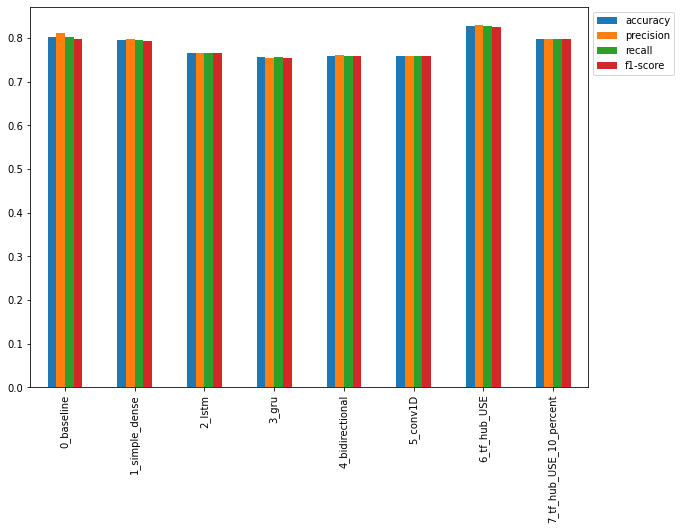

In [88]:
model_all_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Since the f1-score is the combination of recall and precision so let's plot f1-score value of each model in descending order

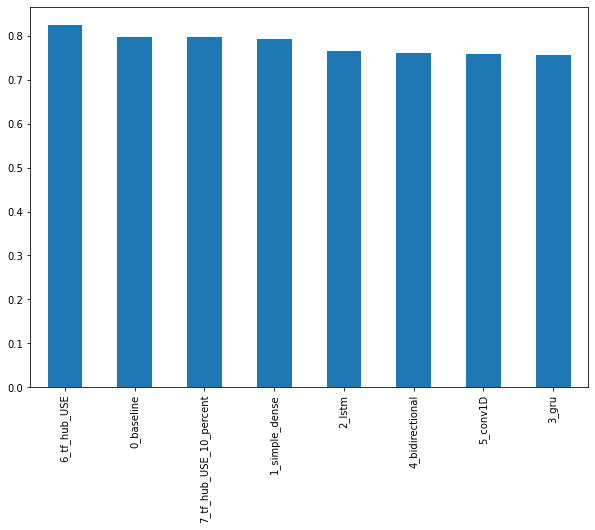

In [89]:
model_all_results['f1-score'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 7));

**Baseline**(`baseline_model`) is outperforming all the deep learning models except **Tensorflow Hub Universal Sentence Encoder** model i.e `model_6`.

So always start with Baseline model training approach.

## Uploading our model's training logs to TensorBoard


In [93]:
SAVE_DIR

'model_logs'

In [94]:
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP Experiments" \
  --description "A series of experiments of Natural Language processing dataset using many different approaches" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/Qxg0oj9rQw231Ad4MZYwig/

[2023-02-08T03:26:06] Started scanning logdir.
[2023-02-08T03:26:17] Total uploaded: 210 scalars, 0 tensors, 7 binary objects (2.7 MB)
[2023-02-08T03:26:17] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/Qxg0oj9rQw231Ad4MZYwig/


## Save and Load the Best performing model

`model_6` performed the best, so let's save that model i.e Universal Sentence Encoder TF Hub model

In [96]:
model_dir = "drive/MyDrive/Data Science/NLP_Disaster_Tweet/nlp_disaster_twt_classifier_USE.h5"

# saving the model in hd5 format
model_6.save(f"{model_dir}")

In [97]:
# load model with custom hub layer (required for HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model(model_dir, custom_objects={"KerasLayer":hub.KerasLayer})

In [98]:
# Evaluate the model
loaded_model_6_evaluate = loaded_model_6.evaluate(val_sentences,
                                                  val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4294 - accuracy: 0.8268


In [99]:
model_6_results

{'accuracy': 82.67716535433071,
 'precision': 0.8300866466031345,
 'recall': 0.8267716535433071,
 'f1-score': 0.8247090008454357}

## Visualizing our Model's most wrong predictions

We'll try to visualize model's wrong predictions and the model that we will consider is our best performing model i.e `model_6`

So what we need ? We have,
- Tweets in `val_sentences`
- Actual Labels in `val_labels`
- Prediction Probabilities in `model_6_pred_probs`
- Predicted Labels in `model_6_preds`

So let's create a dataframe for the above variables.


In [104]:
tf.squeeze(model_6_pred_probs[:10])

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.4112893 , 0.12370362, 0.08662965, 0.08976427, 0.9920439 ,
       0.5954548 , 0.11710725, 0.9699294 , 0.14874981, 0.11603939],
      dtype=float32)>

In [111]:
model_6_predictions_df = pd.DataFrame({"tweets": val_sentences,
                                       "actual": val_labels,
                                       "pred_probs": tf.squeeze(model_6_pred_probs),
                                       "pred":model_6_preds}).sort_values('pred_probs', ascending=False)
# reset the index
model_6_predictions_df.reset_index(drop=True,inplace=True)

In [113]:
model_6_predictions_df.head()

,tweets,actual,pred_probs,pred
0,Dramatic Video Shows Plane Landing During Viol...,1,0.996967,1.0
1,Malaysia Airlines Flight 370 that Disappeared ...,1,0.995433,1.0
2,Gunmen open fire on bus near El Salvador's cap...,1,0.995371,1.0
3,Monsoon flooding - Monsoon rains have have hit...,1,0.995311,1.0
4,24 killed in two simultaneous rail crash as ac...,1,0.995307,1.0


In [116]:
# let's identify the most wrong predictions
model_6_wrong_predictions = model_6_predictions_df[model_6_predictions_df['actual']!=model_6_predictions_df['pred']]

model_6_wrong_predictions.head() # These are false positive, when the actual is 0 but model is predicted 1

,tweets,actual,pred_probs,pred
9,Kosciusko police investigating pedestrian fata...,0,0.990604,1.0
85,Episcopal priests on road trip with interracia...,0,0.952838,1.0
96,FAAN orders evacuation of abandoned aircraft a...,0,0.948847,1.0
99,Two Jewish Terrorists Charged In Historic-Chur...,0,0.944920,1.0
109,@writebothfists It got pretty windy here too.....,0,0.933099,1.0


In [117]:
# How many wrong predictions are there?
len(model_6_wrong_predictions)

132

In [118]:
model_6_wrong_predictions.tail() # These are false negative, when the actual is 1 but model predicted 0

,tweets,actual,pred_probs,pred
688,@Truly_Stings Yo Dm me,1,0.064157,0.0
693,Jack Wilshere has poor injury recordand his of...,1,0.062328,0.0
698,Pandemonium use to be my fav cd ?? I had to ge...,1,0.060542,0.0
716,Keep shape your shoes ??#Amazon #foot #adjust ...,1,0.055170,0.0
744,Man Currensy really be talkin that talk... I'd...,1,0.042321,0.0


In [119]:
# Check the false positives
for row in model_6_wrong_predictions[:10].itertuples():
  _, tweet, actual, pred_probs, pred = row
  print(f"Target: {actual}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Tweet:\n{tweet}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9906039834022522
Tweet:
Kosciusko police investigating pedestrian fatality hit by a train Thursday http://t.co/m5djLLxoZP

----

Target: 0, Pred: 1.0, Prob: 0.9528384804725647
Tweet:
Episcopal priests on road trip with interracial family shares harrowing story of police harassment http://t.co/RG4JIsHyBs via @dailykos

----

Target: 0, Pred: 1.0, Prob: 0.9488469362258911
Tweet:
FAAN orders evacuation of abandoned aircraft at MMA http://t.co/dEvYbnVXGQ via @todayng

----

Target: 0, Pred: 1.0, Prob: 0.9449200630187988
Tweet:
Two Jewish Terrorists Charged In Historic-Church Arson | The Ugly Truth http://t.co/iEksNFSbY7 http://t.co/VWCf3slkrW

----

Target: 0, Pred: 1.0, Prob: 0.9330989122390747
Tweet:
@writebothfists It got pretty windy here too... But no damage.

----

Target: 0, Pred: 1.0, Prob: 0.8820136785507202
Tweet:
Robert Conquest Famine Museum Kiev @GuidoFawkes @MediaGuido https://t.co/WE40iUX7Ib

----

Target: 0, Pred: 1.0, Prob: 0.8804405927658081


In [123]:
# Check the false negatives
for row in model_6_wrong_predictions[-10:].itertuples():
  _, tweet, actual, pred_probs, pred = row
  print(f"Target: {actual}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Tweet:\n{tweet}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.08289161324501038
Tweet:
Please allow me to reiterate it's not the weapon it's the mindset of the individual! #professional #help! -LEGION! https://t.co/2lGTZkwMqW

----

Target: 1, Pred: 0.0, Prob: 0.08053254336118698
Tweet:
GAElite 0    Explosion Greg 2 [Top 3rd] [0 Out] [0 balls] [0 strikes] ... No one on [P: #16 Morgan Orchard] [B: ]

----

Target: 1, Pred: 0.0, Prob: 0.07742441445589066
Tweet:
Meek Mill responds to DrakeÛªs OVO Fest set with wedgie threat http://t.co/qqSKYbARNg

----

Target: 1, Pred: 0.0, Prob: 0.07410547137260437
Tweet:
Watch how bad that fool get burned in coverage this year. Dat dude is all-pro practice squad material

----

Target: 1, Pred: 0.0, Prob: 0.06825987249612808
Tweet:
Flattened thee striker

----

Target: 1, Pred: 0.0, Prob: 0.06415656954050064
Tweet:
@Truly_Stings Yo Dm me

----

Target: 1, Pred: 0.0, Prob: 0.06232791393995285
Tweet:
Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal

## Making and Visualizing Predictions on Test Dataset

So far we have evaluated our model on `train` and `validation` data but real test would be how our model is performing in the real world data, so before directly testing it with custom tweets we have our `test` data to make predictions with our best performing model.

In [125]:
# view our test data
test_df[:10]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


We want to make this test data compatible with our model

In [127]:
test_sentences = test_df['text'].to_numpy()
test_sentences[:10]

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       'Apocalypse lighting. #Spokane #wildfires',
       'Typhoon Soudelor kills 28 in China and Taiwan',
       "We're shaking...It's an earthquake",
       "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
       'Hey! How are you?', 'What a nice hat?', 'Fuck off!'], dtype=object)

In [128]:
# Make predictions
test_pred_probs = model_6.predict(test_sentences)

test_pred_probs[:10]

102/102 [==============================] - 1s 12ms/step


array([[0.6496799 ],
       [0.8729977 ],
       [0.8864363 ],
       [0.91369927],
       [0.9693103 ],
       [0.4697555 ],
       [0.06590932],
       [0.05289321],
       [0.07023633],
       [0.06235705]], dtype=float32)

In [129]:
# convert them into comparable labels
test_preds = tf.squeeze(tf.round(test_pred_probs))
test_preds

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [139]:
# copy the test_df
test_prediction_df = test_df

test_prediction_df['probs'] = tf.squeeze(test_pred_probs)
test_prediction_df['predictions'] = test_preds.numpy()

In [140]:
test_prediction_df.head()

,id,keyword,location,text,predictions,probs
0,0,NaN,NaN,Just happened a terrible car crash,1.0,0.649680
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1.0,0.872998
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1.0,0.886436
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1.0,0.913699
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.969310


In [142]:
# visualize some predictions
num_of_text = 10
for row in test_prediction_df[:num_of_text].itertuples():
  _,_,_,_,text,prediction,prob = row
  pred_label = "Disaster" if prediction==1 else "Not a Disaster"
  print(f"Prediction: {pred_label}, Probs: {prob:2f}")
  print(f"Text :\n{text}\n")  

Prediction: Disaster, Probs: 0.649680
Text :
Just happened a terrible car crash

Prediction: Disaster, Probs: 0.872998
Text :
Heard about #earthquake is different cities, stay safe everyone.

Prediction: Disaster, Probs: 0.886436
Text :
there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all

Prediction: Disaster, Probs: 0.913699
Text :
Apocalypse lighting. #Spokane #wildfires

Prediction: Disaster, Probs: 0.969310
Text :
Typhoon Soudelor kills 28 in China and Taiwan

Prediction: Not a Disaster, Probs: 0.469756
Text :
We're shaking...It's an earthquake

Prediction: Not a Disaster, Probs: 0.065909
Text :
They'd probably still show more life than Arsenal did yesterday, eh? EH?

Prediction: Not a Disaster, Probs: 0.052893
Text :
Hey! How are you?

Prediction: Not a Disaster, Probs: 0.070236
Text :
What a nice hat?

Prediction: Not a Disaster, Probs: 0.062357
Text :
Fuck off!

